Transformée de Fourier de la fonction porte :
========================
calcul symbolique d'intégrale en python avec sympy 
===========================

In [9]:
from IPython.display import display
from sympy import *
from sympy import fourier_transform, Piecewise
from sympy.plotting import plot
from sympy.abc import x,f
#import sys
%matplotlib inline


Considérons la fonction $g$

$$ g(x) = 
\begin{cases} 
      0 & x < -a \\
      1 & -a\leq x\leq a \\
      0 & x > a
\end{cases}
$$

Traitons l'exemple $a=0.5$. On garde la notation $f$ pour la fréquence, qui va apparaître en résultat du calcul de la transformée de Fourier.

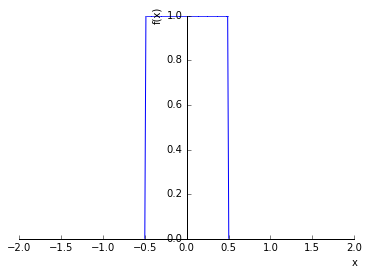

In [10]:
a=0.5
g = Piecewise ((0,x<-a),(1,x<a),(0,True)) 
plot(g,(x,-2,2),adaptive=False, num_of_points=20)

On a calculé en TD que la transformée de Fourier de $g$ vaut $G(\omega) = 2a.sinc(a\omega)$.

Dans notre cas particulier $a=0.5$, $G(w)=sinc(\frac{\omega}{2})$. 

En exprimant ce résultat en fonction de la fréquence $f$ plutôt que la pulsation $\omega$ (avec $f=2\pi.\omega$), on trouve $G(f)=sinc(\pi.f)=\frac{sin(\pi.f)}{\pi.f}$

Montrons que pour se dispenser de calcul d'intégrale à la main, on peut aussi trouver ce résultat en utilisant la librairie de calcul symbolique sympy, et traçons $G(f)$. 

⎧  1.0     for 2⋅π⋅f = 0
⎪                       
⎨sin(π⋅f)               
⎪────────    otherwise  
⎩  π⋅f                  

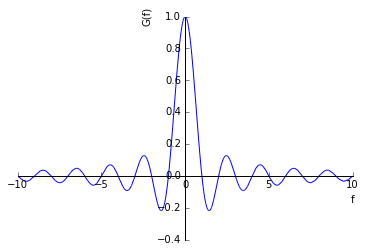

In [11]:
fh=simplify(fourier_transform(g,x,f).rewrite(cos))
init_printing(use_latex='mathjax')
display(fh)
plot(fh,ylabel='G(f)')

Pour les curieux de sympy, on peut décomposer les étapes du calcul symbolique comme suit :

In [12]:
init_printing(use_latex='mathjax')
etape1 = fourier_transform(g,x,f)
display(etape1)
etape2 = etape1.rewrite(cos)
display(etape2)
etape3 = simplify(etape2)
display(etape3)

⎧              1.0                 for 2⋅π⋅f = 0
⎪                                               
⎪  ⎛   2.0⋅ⅈ⋅π⋅f    ⎞  -1.0⋅ⅈ⋅π⋅f               
⎨ⅈ⋅⎝- ℯ          + 1⎠⋅ℯ                         
⎪────────────────────────────────    otherwise  
⎪             2⋅π⋅f                             
⎩                                               

⎧                              1.0                                for 2⋅π⋅f = 
⎪                                                                             
⎨ⅈ⋅(-ⅈ⋅sin(π⋅f) + cos(π⋅f))⋅(-ⅈ⋅sin(2.0⋅π⋅f) - cos(2.0⋅π⋅f) + 1)              
⎪───────────────────────────────────────────────────────────────    otherwise 
⎩                             2⋅π⋅f                                           

0
 
 
 
 

⎧  1.0     for 2⋅π⋅f = 0
⎪                       
⎨sin(π⋅f)               
⎪────────    otherwise  
⎩  π⋅f                  